In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(15,17)})

df= pd.read_csv("I:/Visual Analytics/Assignements/netflix.csv")  

#### *Pulling in Netflix.csv file. Performing EDA, provide overall summary statistics and visualizations to show distribution of numerical and categorical variables.

In [3]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [5]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


<AxesSubplot:xlabel='type', ylabel='count'>

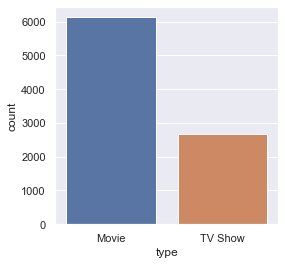

In [8]:
sns.set(rc={'figure.figsize':(4,4)})
sns.countplot(data=df, x="type")

Conclusion:  More than twice as much Movies release than TV Shows

(1980.0, 2021.0)

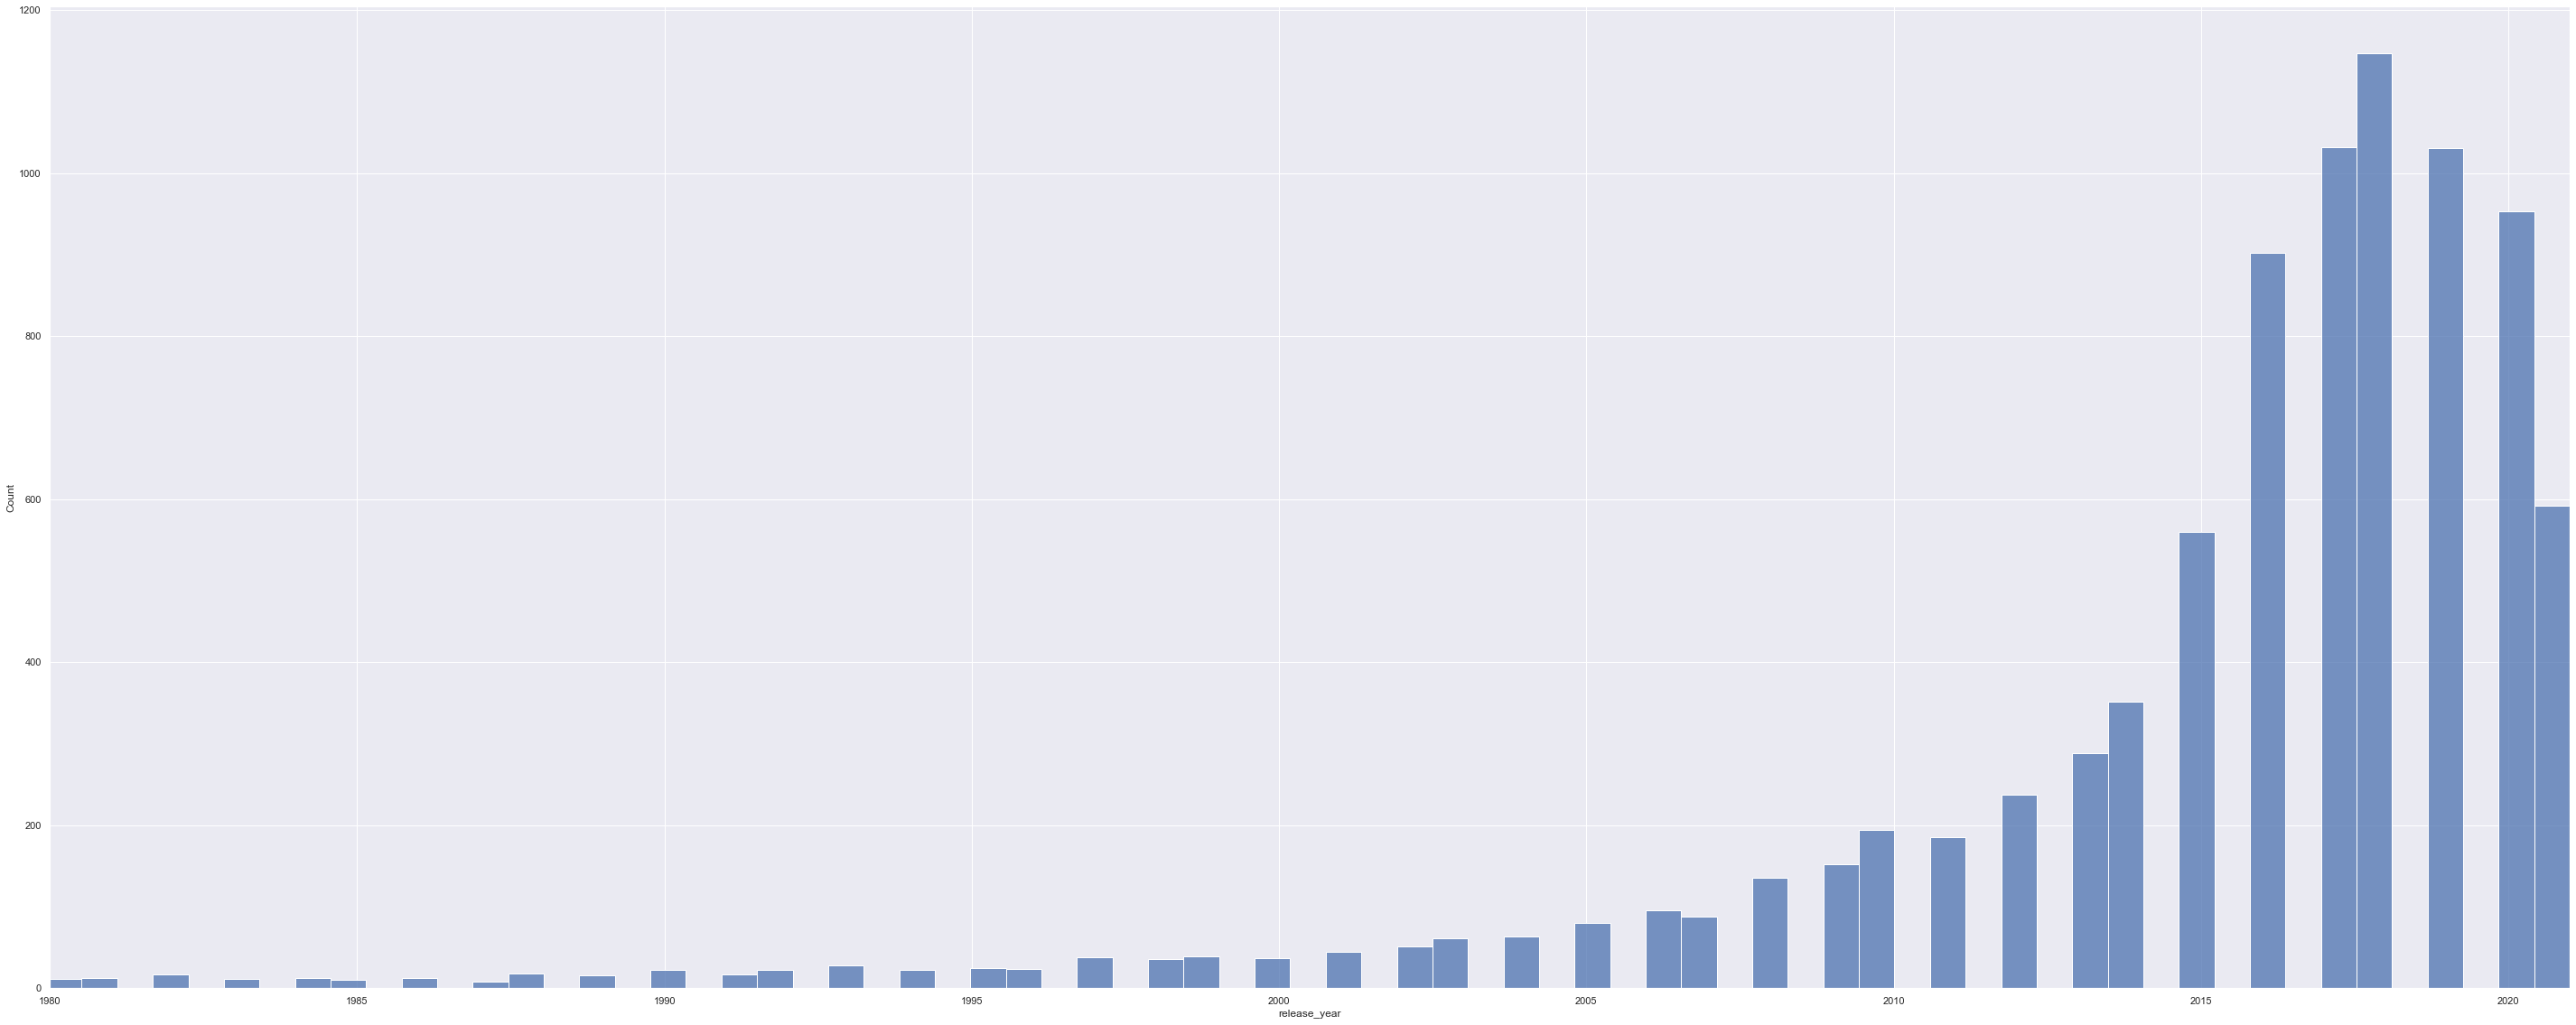

In [14]:
sns.set(rc={'figure.figsize':(50,20)})

movie_count= sns.histplot(data = df, x="release_year")
movie_count.set_xlim(1980, 2021)

Conclusion: Most Movies and TV shows were released in the year 2015



#### *Filtering for and find the total number of movies in the Netflix dataset.

In [55]:
df.title.duplicated().sum()
print(df['type'].value_counts()['Movie'])
df['']

6131


#### *Adding a continent column to the dataset in order to not only see the country of the movie but also the corresponding continent.

In [150]:
cnt=pd.read_csv("https://raw.githubusercontent.com/dbouquin/IS_608/master/NanosatDB_munging/Countries-Continents.csv")  
cnt["Country"]=cnt["Country"].replace("US","United States")
cnt.head(170)

,Continent,Country
0,Africa,Algeria
1,Africa,Angola
2,Africa,Benin
3,Africa,Botswana
4,Africa,Burkina
...,...,...
165,North America,Saint Vincent and the Grenadines
166,North America,Trinidad and Tobago
167,North America,United States
168,Oceania,Australia


In [106]:
df.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

In [246]:
nf=df.join(cnt.set_index('Country'), on='country')
nf.head(30)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Continent
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",North America
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Africa
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,NaN
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",NaN
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,Asia
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,NaN
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,NaN
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",NaN
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,Europe
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,North America


#### Pulling in IMDB_movies and IMDB_votes files and joining them. Checking and handling duplicate values in IMDB_movies dataset. Also, describing why to chose to handle the duplicates in such a way and the alternative(s)

In [186]:
df2= pd.read_excel("I:/Visual Analytics/Assignements/imdb_votes.xlsx") 

df2.head()

,imdb_title_id,avg_vote
0,tt0000009,5.9
1,tt0000574,6.1
2,tt0001892,5.8
3,tt0002101,5.2
4,tt0002130,7.0


In [187]:
df3= pd.read_excel("I:/Visual Analytics/Assignements/imdb_movies.xlsx") 

df3.drop_duplicates(subset=["title", "director"], keep=False) 

#Used this method because movies can have same title having different directors.
#Alternative way could be use of a lambda function and applying it in the data frame

,imdb_title_id,title,director
0,tt0000009,Miss Jerry,Alexander Black
1,tt0000574,The Story of the Kelly Gang,Charles Tait
2,tt0001892,Den sorte drøm,Urban Gad
3,tt0002101,Cleopatra,Charles L. Gaskill
4,tt0002130,L'Inferno,"""Francesco Bertolini, Adolfo Padovan"""
...,...,...,...
85849,tt9908390,Le lion,Ludovic Colbeau-Justin
85850,tt9911196,De Beentjes van Sint-Hildegard,Johan Nijenhuis
85851,tt9911774,Padmavyuhathile Abhimanyu,Vineesh Aaradya
85852,tt9914286,Sokagin Çocuklari,Ahmet Faik Akinci


In [193]:
imdb=df2.join(df3.set_index("imdb_title_id"), on= "imdb_title_id")

imdb.head()

,imdb_title_id,avg_vote,title,director
0,tt0000009,5.9,Miss Jerry,Alexander Black
1,tt0000574,6.1,The Story of the Kelly Gang,Charles Tait
2,tt0001892,5.8,Den sorte drøm,Urban Gad
3,tt0002101,5.2,Cleopatra,Charles L. Gaskill
4,tt0002130,7.0,L'Inferno,"""Francesco Bertolini, Adolfo Padovan"""


In [189]:
imdb.nunique()

imdb_title_id    85855
avg_vote            89
title            82093
director         34733
dtype: int64

In [201]:
print(imdb.director.isna().sum())
print(nf.director.isna().sum())

nf.dropna(inplace = True)

print(nf.director.isna().sum())



88
2634
0


#### Joining IMDB datasets with the Netflix.csv file on title and director columns. Before joining the datasets, cleaning the title and director columns explaining what cleaning operations to perform and why.

In [239]:
mg_df=pd.merge(nf, imdb,  how='left', left_on=['title','director'], right_on = ['title','director'])

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Continent,imdb_title_id,avg_vote
317,s957,Movie,Zack and Miri Make a Porno,Kevin Smith,"Seth Rogen, Elizabeth Banks, Craig Robinson, J...",United States,"May 1, 2021",2008,R,101 min,"Comedies, Independent Movies, Romantic Movies",Zack and Miri make and star in an adult film t...,North America,NaN,NaN
367,s1056,Movie,Zoot Suit,Luis Valdez,"Daniel Valdez, Edward James Olmos, Charles Aid...",United States,"April 15, 2021",1981,R,103 min,"Cult Movies, Dramas, Music & Musicals","In this drama based on a 1940s trial, the memb...",North America,tt0083365,6.8
496,s1365,Movie,Zathura,Jon Favreau,"Jonah Bobo, Josh Hutcherson, Dax Shepard, Kris...",United States,"February 1, 2021",2005,PG,101 min,"Children & Family Movies, Sci-Fi & Fantasy",A mysterious game sends two brothers flying in...,North America,NaN,NaN
1052,s2513,Movie,Zaki Chan,Wael Ihsan,"Ahmed Helmy, Yasmin Abdulaziz, Hassan Hosny, H...",Egypt,"May 19, 2020",2005,TV-PG,109 min,"Comedies, International Movies, Romantic Movies",An unqualified young man has his work cut out ...,Africa,NaN,NaN
1374,s3150,Movie,Zindagi Na Milegi Dobara,Zoya Akhtar,"Hrithik Roshan, Abhay Deol, Farhan Akhtar, Kat...",India,"December 15, 2019",2011,TV-14,154 min,"Comedies, Dramas, International Movies",Three friends on an adventurous road trip/bach...,Asia,tt1562872,8.1
1459,s3354,Movie,Zoé: Panoramas,"Rodrigo Guardiola, Gabriel Cruz Rivas","Sergio Acosta, Jesús Báez, Ángel Mosqueda, Rod...",Mexico,"November 1, 2019",2016,TV-MA,89 min,"Documentaries, International Movies, Music & M...",This introspective rockumentary follows the ca...,North America,NaN,NaN
1747,s4081,Movie,Zach Galifianakis: Live at the Purple Onion,Michael Blieden,"Zach Galifianakis, Brian Unger",United States,"February 26, 2019",2006,TV-MA,61 min,Stand-Up Comedy,"The unorthodox, piano-playing stand-up star Za...",North America,NaN,NaN
1933,s4467,Movie,Zokkomon,Satyajit Bhatkal,"Darsheel Safary, Anupam Kher, Manjari Fadnis, ...",India,"November 1, 2018",2011,PG,104 min,"Children & Family Movies, Dramas","When his cruel uncle abandons him, a young orp...",Asia,NaN,NaN
2012,s4616,Movie,Zindagi Kitni Haseen Hay,Anjum Shahzad,"Feroze Khan, Sajal Ali, Jibrayl Ahmed Rajput, ...",Pakistan,"October 1, 2018",2016,TV-14,126 min,"Dramas, International Movies, Romantic Movies",Two young parents struggle to keep their marri...,Asia,NaN,NaN
2044,s4708,Movie,Zion,Floyd Russ,Zion Clark,United States,"August 10, 2018",2018,TV-PG,12 min,"Documentaries, Sports Movies",Born without legs and stuck in foster care for...,North America,NaN,NaN


Q6

In [268]:
tdf=nf.merge(imdb.set_index('title'), on='title')
mg_df.drop_duplicates(subset=['title'], keep=False) 
mg_df.title


0       The Great British Baking Show
1                        The Starling
2                               Jeans
3                           Grown Ups
4                          Dark Skies
                    ...              
4214                            Zenda
4215                           Zodiac
4216                       Zombieland
4217                             Zoom
4218                           Zubaan
Name: title, Length: 4219, dtype: object

answer: 1984 movies in total

Q7

In [257]:
cmd=mg_df[mg_df.listed_in.str.contains('Comedies')].sort_values(by='avg_vote', ascending=False)

cmd.loc[:,["title","avg_vote","release_year","Continent"]].head(15)

,title,avg_vote,release_year,Continent
3190,Gol Maal,8.6,1979,Asia
389,3 Idiots,8.4,2009,Asia
1585,Super Deluxe,8.4,2019,Asia
3443,Love Ni Bhavai,8.4,2017,Asia
1845,Andhadhun,8.3,2018,Asia
2993,Chupke Chupke,8.3,1975,Asia
1302,Sillu Karuppatti,8.2,2019,Asia
1071,Andaz Apna Apna,8.2,1994,Asia
930,Queen,8.2,2014,Asia
4111,Trainspotting,8.1,1996,Europe


9 out of 10 top rated comedies were made in Asia.